# MVP-Analise Exploratória - PUC-Rio
Aluno: Tales Gonçalves


# 1. Objetivo
Esta análise visa compreender os dados armazenados no aplicativo Strava que contém informações sobre as minhas atividades de ciclismo, corrida, musculação, entre outras, que são coletadas durante o uso de aparelho celular ou smart watch.

O objetivo será verificar a relação da frequência cardíaca com as distâncias percorridas, os tempos das atividade e os ganhos de elevação para entender a evolução no condicionamento físico do atleta.

Para conhecimento de mais detalhes sobre o aplicativo Strava acesse www.strava.com meu perfil https://www.strava.com/athletes/11601498.

## 1.1 Análise
Nesta etapa realizamos a leitura do arquivo json que esta no meu diretório do Github (https://raw.githubusercontent.com/tal-rsg/mvp-analise/main/strava_data.json). Este arquivo foi carregado através de outra etapa que não será abordado nesta análise.

As bibliotecas utilizadas para realizar uma análise explorartória dos dados utilizando a estatístia descritiva para compreender as informações serão carregadas no início do notebook. Cada trecho do código contém comentários para explicar o que cada função executa.
 

In [132]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
import seaborn as sns
from datetime import datetime, timedelta
from pandas.plotting import scatter_matrix
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### 1.1.1 Explorando os dados

Com a biblioteca Pandas é feita a leitura dos dados atravez da função read_json() diretamente do diretório no Github onde esta armazenado o arquivo que será analisado.
Após a leitura do arquivo verificamos se o dataframe está de acordo com o Pandas usando a função type().

In [133]:
# lendo arquivo json e visualizando as 10 primeiras linhas
df = pd.read_json('https://raw.githubusercontent.com/tal-rsg/mvp-analise/main/strava_data.json')

# verificando se é um dataframe
type(df)

pandas.core.frame.DataFrame

Com o dataframe validado é verificado o tamanho dele.

In [134]:
# verificando a quantidade de instâncias (linhas) e atributos (colunas) do dataframe
df.shape

(893, 54)

Listando as primerias linhas para uma pré-visualização das informações.

In [135]:
df.head()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,average_temp,average_cadence
0,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,21662.8,6352,16608,481.5,Ride,Ride,NaN,...,275.5,10882562098,10882562098,garmin_ping_303102490716,False,1,0,False,NaN,NaN
1,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,20281.0,7385,15289,489.1,Ride,Ride,NaN,...,275.5,10869742534,10869742534,garmin_ping_302746503097,False,1,0,False,NaN,NaN
2,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,21828.0,8172,16371,562.4,Ride,Ride,NaN,...,274.8,10840112548,10840112548,garmin_ping_301874679075,False,0,0,False,NaN,NaN
3,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,24342.8,6423,15739,331.8,Ride,Ride,NaN,...,271.6,10808240635,10808240635,garmin_ping_300982622245,False,0,0,False,NaN,NaN
4,2,"{'id': 11601498, 'resource_state': 1}",Morning Ride,19236.5,8046,15944,501.2,Ride,Ride,NaN,...,275.2,10742166684,10742166684,garmin_ping_299202202209,False,2,0,False,NaN,NaN


Por conter muitos atributos (colunas), será listado somente o nome destes.

In [136]:
# listando o nome das colunas
df.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_watts', 'kilojoules',
       'device_watts', 'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'average_temp', 'average_cadence'],
      dtype='object')

In [137]:
# exibindo a quantidade de linhas por colunas
df.count()

resource_state                   893
athlete                          893
name                             893
distance                         893
moving_time                      893
elapsed_time                     893
total_elevation_gain             893
type                             893
sport_type                       893
workout_type                     319
id                               893
start_date                       893
start_date_local                 893
timezone                         893
utc_offset                       893
location_city                     44
location_state                    44
location_country                 893
achievement_count                893
kudos_count                      893
comment_count                    893
athlete_count                    893
photo_count                      893
map                              893
trainer                          893
commute                          893
manual                           893
p

Analisando os atributos e se possuíem valores nulos.

In [138]:
# verificando se há atributos com valores vazios
df.isnull().sum()

resource_state                     0
athlete                            0
name                               0
distance                           0
moving_time                        0
elapsed_time                       0
total_elevation_gain               0
type                               0
sport_type                         0
workout_type                     574
id                                 0
start_date                         0
start_date_local                   0
timezone                           0
utc_offset                         0
location_city                    849
location_state                   849
location_country                   0
achievement_count                  0
kudos_count                        0
comment_count                      0
athlete_count                      0
photo_count                        0
map                                0
trainer                            0
commute                            0
manual                             0
p

Devido a quantidade de atributos, será criado um novo dataframe com a seleção somente dos necessários para esta análise.


In [139]:
# criando um novo dataframe com a seleção de alguns atributos
df_strava = df.loc[:,['name','distance','moving_time','total_elevation_gain','type','sport_type','id','start_date','average_speed','max_speed','average_heartrate','max_heartrate', 'elev_high', 'elev_low','average_temp']]


# validando o dataframe novamente
type(df_strava)


pandas.core.frame.DataFrame

Validado a construção do novo datraframe com a seleção de alguns atribuitos, continuamos a análise listando as primeiras linhas.

In [140]:
# listando as primeiras linhas
df_strava.head()

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
0,Morning Ride,21662.8,6352,481.5,Ride,Ride,10160257723,2023-11-04T11:11:10Z,3.410,13.032,152.8,189.0,599.5,275.5,NaN
1,Morning Ride,20281.0,7385,489.1,Ride,Ride,10148032615,2023-11-02T10:26:44Z,2.746,11.712,147.4,196.0,536.5,275.5,NaN
2,Morning Ride,21828.0,8172,562.4,Ride,Ride,10119802777,2023-10-28T11:03:56Z,2.671,11.045,151.9,194.0,533.1,274.8,NaN
3,Morning Ride,24342.8,6423,331.8,Ride,Ride,10089183560,2023-10-21T11:45:01Z,3.790,10.856,139.6,192.0,410.7,271.6,NaN
4,Morning Ride,19236.5,8046,501.2,Ride,Ride,10025746502,2023-10-12T10:54:38Z,2.391,10.828,146.8,189.0,548.4,275.2,NaN


Agora vamos analisar os tipos de atribuitos no novo dataframe

In [141]:
# listando os tipos  dos atributo
df_strava.dtypes

name                     object
distance                float64
moving_time               int64
total_elevation_gain    float64
type                     object
sport_type               object
id                        int64
start_date               object
average_speed           float64
max_speed               float64
average_heartrate       float64
max_heartrate           float64
elev_high               float64
elev_low                float64
average_temp            float64
dtype: object

Observa-se que os atributos possuiem tipos diferentes e alguns com características de classificadores como a coluna "sport_type" que classifica o tipo de esporte praticado.
Listamos  apenas os atributos contidos na coluna sport_type para checagem.

In [142]:
# listando os valores únicos no atributo
df_strava['sport_type'].unique()

array(['Ride', 'Workout', 'Walk', 'WeightTraining'], dtype=object)

Checando a quantidade de registros por tipo de esporte registrado na coluna sport_type.

In [143]:
# agrupando a coluna e realizando a contagem de registros
totlspt = df_strava.groupby('sport_type')['id'].count().reset_index(name='total_Id')

# imprimindo o resultado
print(totlspt)

       sport_type  total_Id
0            Ride       842
1            Walk         4
2  WeightTraining        39
3         Workout         8


Com o objetivo de centralizar a análise nas atividades de ciclismo, filtramos o dataframe pelo atributo sport_type igual a "Ride" e o atributo distance maior que dez kilometros.


In [144]:
# novo dataframe com o filtro por tipo de esporte
df_ride = df_strava.loc[(df_strava['sport_type'] == "Ride") & (df_strava['distance'] >= 10000)]

# listando as primeiras linhas
df_ride.head()

,name,distance,moving_time,total_elevation_gain,type,sport_type,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
0,Morning Ride,21662.8,6352,481.5,Ride,Ride,10160257723,2023-11-04T11:11:10Z,3.410,13.032,152.8,189.0,599.5,275.5,NaN
1,Morning Ride,20281.0,7385,489.1,Ride,Ride,10148032615,2023-11-02T10:26:44Z,2.746,11.712,147.4,196.0,536.5,275.5,NaN
2,Morning Ride,21828.0,8172,562.4,Ride,Ride,10119802777,2023-10-28T11:03:56Z,2.671,11.045,151.9,194.0,533.1,274.8,NaN
3,Morning Ride,24342.8,6423,331.8,Ride,Ride,10089183560,2023-10-21T11:45:01Z,3.790,10.856,139.6,192.0,410.7,271.6,NaN
4,Morning Ride,19236.5,8046,501.2,Ride,Ride,10025746502,2023-10-12T10:54:38Z,2.391,10.828,146.8,189.0,548.4,275.2,NaN


Validando se o novo dataframe só contém um tipo de valor na coluna sport_type

In [145]:
df_ride['sport_type'].unique()

array(['Ride'], dtype=object)

Visualizando o resumo estatístico dos atribuitos.

In [146]:
# exibindo o sumário estatístico
df_ride.describe()

,distance,moving_time,total_elevation_gain,id,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
count,698.000000,698.000000,698.000000,6.980000e+02,698.000000,698.000000,370.000000,370.000000,698.000000,698.000000,438.000000
mean,35981.371633,6829.449857,557.890401,3.390663e+09,5.388079,13.765044,151.970000,182.370270,459.484097,228.584384,25.538813
std,19156.290060,3327.196663,332.395782,2.476820e+09,1.579684,2.700869,8.096571,9.569355,197.240437,109.222479,4.341498
min,10012.200000,798.000000,0.000000,4.056882e+08,1.761000,5.300000,109.200000,141.000000,0.000000,-34.200000,12.000000
25%,24651.575000,4672.250000,354.000000,1.357568e+09,4.439500,12.277500,147.325000,176.000000,404.650000,218.200000,23.000000
50%,31587.550000,5917.500000,511.000000,2.717969e+09,5.401000,13.500000,152.050000,183.000000,464.900000,263.200000,26.000000
75%,43994.825000,8473.250000,717.050000,5.093020e+09,6.094000,14.900000,157.425000,188.000000,546.350000,276.975000,28.000000
max,200526.000000,36664.000000,2764.000000,1.016026e+10,26.472000,29.000000,174.500000,232.000000,1615.600000,985.500000,38.000000


Visualizando a distribuição histórica dos atributos

<Figure size 432x288 with 0 Axes>

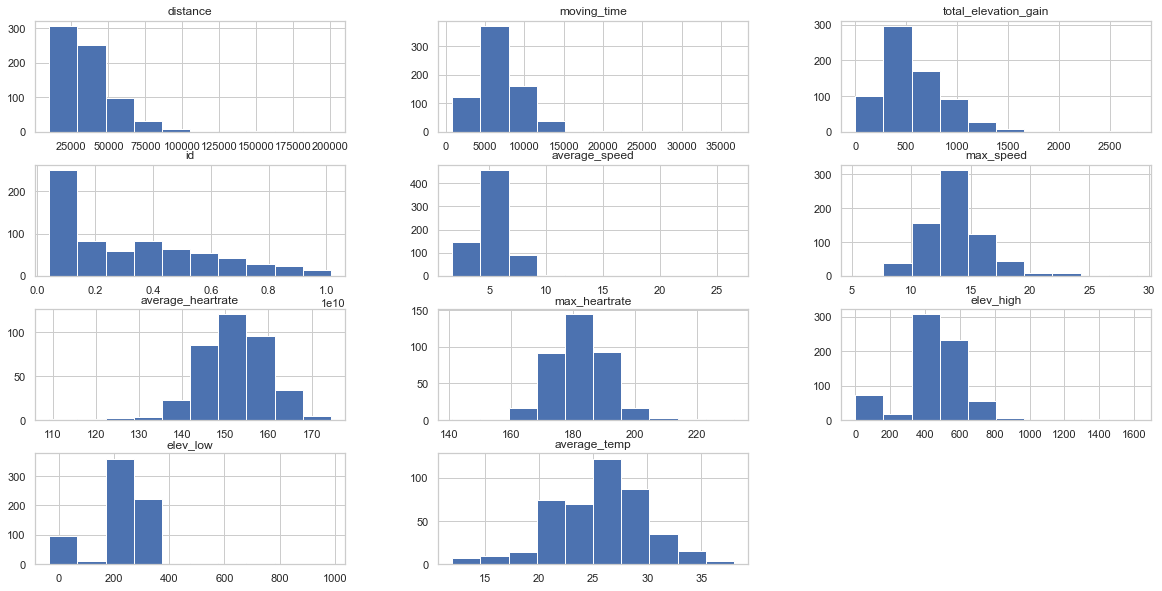

In [147]:
#visualizando a distribuição dos dados
plt.figure();

df_ride.hist(figsize=(20, 10));

No gráfico acima é possível observar que os dados não possuem uma assimetria do seus valores.

## 1.2 Pré-processamento
Neste ponto iremos tratar os valores nulos e algumas informações para verificar se as informações respondem as perguntas iniciais.

### 1.2.1 Limpando os dados

Analisando se há valores nulos no dataframe

Text(0.5, 1.0, 'Verificando se há valores nulos')

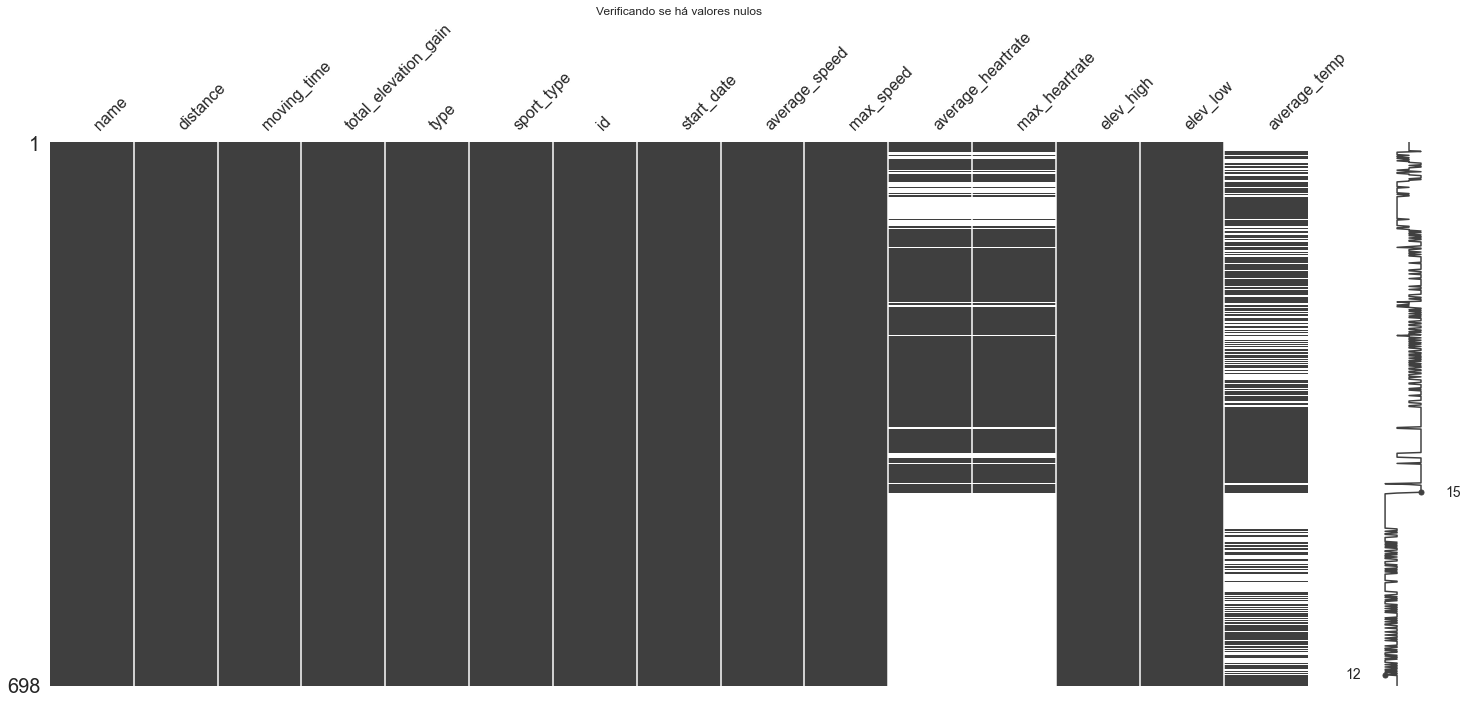

In [148]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_ride)
plt.title('Verificando se há valores nulos')

Verificando a quantidade de valores nulos

In [149]:
df_ride.isnull().sum()

name                      0
distance                  0
moving_time               0
total_elevation_gain      0
type                      0
sport_type                0
id                        0
start_date                0
average_speed             0
max_speed                 0
average_heartrate       328
max_heartrate           328
elev_high                 0
elev_low                  0
average_temp            260
dtype: int64

### 1.2.2 Tratando os dados

Indenfica-se que os atributos average_heartrate, max_heartrate e average_temp possuiem uma quantidade consideravel de valores nulos, sendo assim será feito o tratamento dos valores nulos criando novos valores usando o calculo da mediana.


Text(0.5, 1.0, 'Visulizando se há valores nulos')

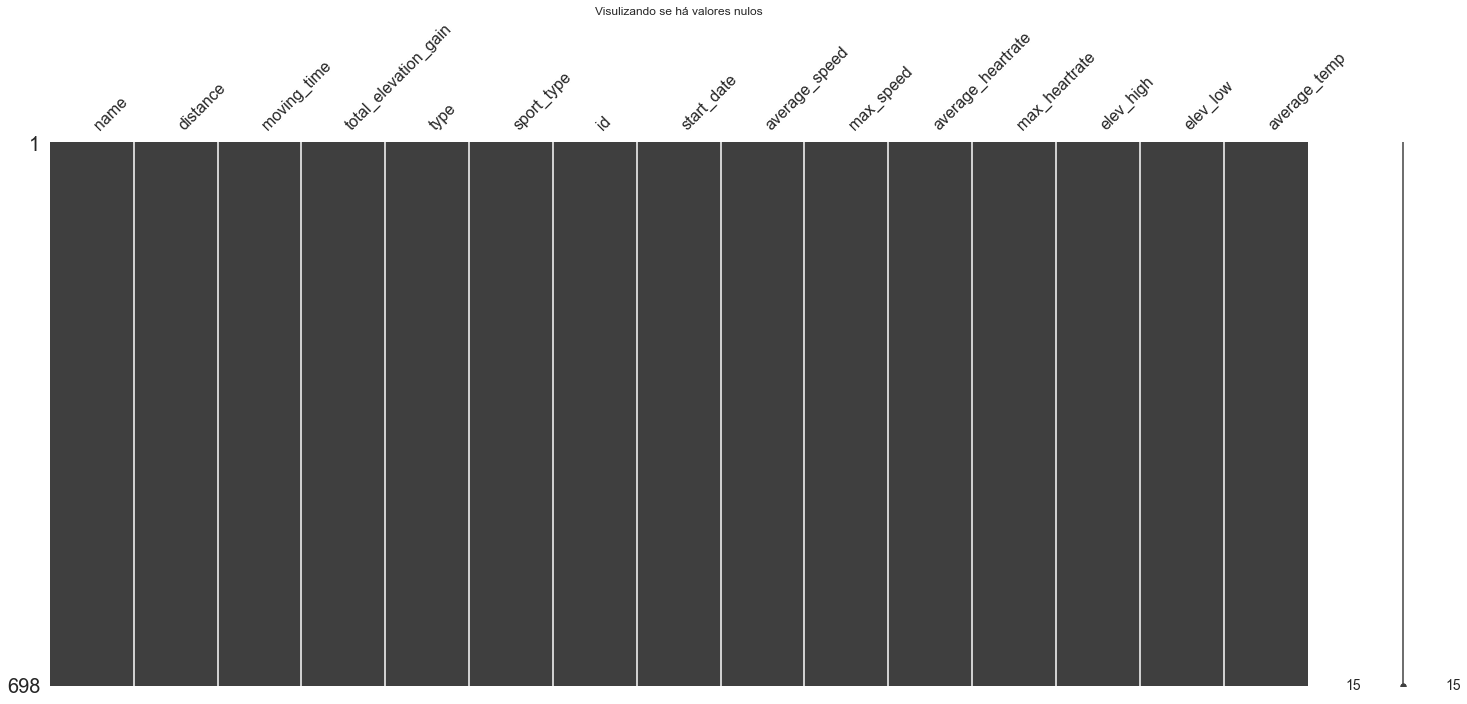

In [150]:
# substituindo os NaN de 'Glucose', 'BloodPressure' e 'BMI' pela mediana da coluna
df_ride['average_heartrate'].fillna(df_ride['average_heartrate'].median(), inplace=True)
df_ride['max_heartrate'].fillna(df_ride['max_heartrate'].median(), inplace=True)
df_ride['average_temp'].fillna(df_ride['average_temp'].median(), inplace=True)

# visualizando se ha valores nulos
ms.matrix(df_ride)
plt.title('Visulizando se há valores nulos')

No gráfico acima verifica-se que o datraframe não possuí mais valores nulores para serem tratados.

Com o objetivo de verificar a relação da frequencia cardiáca com o esforço desenvolvido em relação ao tempo de atividades, a distancia percorrida e o ganho de elevação obtido, verifica-se a distribuição dos valores averga_heartrate.

In [151]:
# criando um novo dataframe para análise considerando somente algumas colunas

df_analise = df_ride.loc[:,['distance','start_date','moving_time','total_elevation_gain','average_heartrate','max_heartrate', 'elev_high']]


Text(0.5, 1.0, 'Distribuição da distancia')

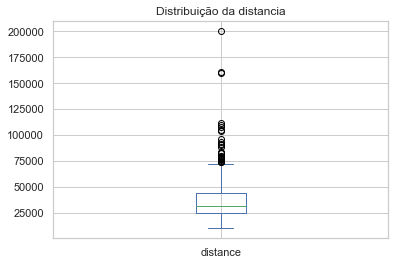

In [152]:
df_analise['distance'].plot.box()
plt.title('Distribuição da distancia')

No gráfico box plot acima é possível verificar que o atributo distance tem a sua concentração entre 25 e 50 kilomentros, mas observa-se que há um outlier em 200 kilometros, mostrando assim uma discrepancia dos dados.

Agora verificarmos o atributo average_heartrate

Text(0.5, 1.0, 'Distribuição do valor máximo de batimentos cardiacos')

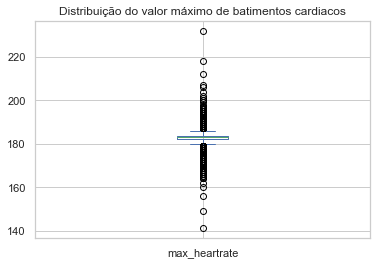

In [153]:
df_analise['max_heartrate'].plot.box()
plt.title('Distribuição do valor máximo de batimentos cardiacos')

Conforme o gráfico acima é possível verificar que os valores estão bastante distribuídos.

### 1.2.3 Novos atributos

Para entender a relação do esforço com a idade no periodo da atividade e definir uma zona de treino conforme a frequência cardiaca serão criados novos atributo para continuidade das análises.

Segundo as literaturas a frequencia cardiaca de um indivíduo é calculada usando a formula: valor 220 – (Idade) = Frequência Cardíaca Máxima, porém o mais indicado é a realização de exames clínicos para se ter mais precisão.
Neste estudo utilizamos a formula acima e criamos um novo atributo no dataframe para auxiliar nas análises.
Os atributos serão a idade do atleta no período da atividade e a frequência cardiaca de acordo com a fórumla acima.

In [154]:
# convertendo o campo start_date para o tipo data
df_analise['start_date'] = pd.to_datetime(df['start_date'])

# funcao para calcular a idade no periodo da atividade
def calculate_age(birthdate):
    current_date = datetime(1980,11,18)
    age = birthdate.year - current_date.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

# criando a nova coluna com o calculo da idade no periodo da atividade
df_analise['Age'] = df_analise['start_date'].apply(calculate_age)

# função para calcular o Frequencia Cardiaca Maxima (FC max)
def calc_fcmax(fcmax):
    fc_max = 220 - fcmax
    return fc_max

# criando a nova coluna com o calculo do FC Max com base na coluna idade
df_analise['FCmax'] = df_analise['Age'].apply(calc_fcmax)

# visualizando o dataframe com a nova coluna
df_analise.head()


,distance,start_date,moving_time,total_elevation_gain,average_heartrate,max_heartrate,elev_high,Age,FCmax
0,21662.8,2023-11-04 11:11:10+00:00,6352,481.5,152.8,189.0,599.5,43,177
1,20281.0,2023-11-02 10:26:44+00:00,7385,489.1,147.4,196.0,536.5,43,177
2,21828.0,2023-10-28 11:03:56+00:00,8172,562.4,151.9,194.0,533.1,43,177
3,24342.8,2023-10-21 11:45:01+00:00,6423,331.8,139.6,192.0,410.7,43,177
4,19236.5,2023-10-12 10:54:38+00:00,8046,501.2,146.8,189.0,548.4,43,177


Para praticar atividade física de forma correta e obter o melhor aproveitamento, é necessário conhecer as zonas de treino e identificar em qual delas você se encontra.

Zonas de treinamento são cinco divisões de escala que determinam a faixa de esforço, sendo a primeira a mais leve e a quinta a mais intensa. Em resumo, elas ajudam a definir quando o esforço é leve, moderado ou forte. 

As zonas são definidas a partir da relação linear entre frequência cardíaca e intensidade de treino, e são calculadas como uma porcentagem da sua frequência cardíaca máxima. É assim que as zonas de treino são estabelecidas:

| Zona | Percentual |
| --- | --- |
| Zona 1 | < 70% |
| Zona 2 | de 70%-75% |
| Zona 3 | 75%-85% |
| Zona 4 | de 85%-95% |
| Zona 5 | > 95% |


Fonte (https://clinicaads.com.br/o-que-sao-as-zonas-de-treino-e-como-elas-podem-lhe-ajudar/)

Desta forma cria-se o atributo da zona de frequencia considerando o máximo batimento cardiaco divido com a frequencia cardica (criado na etapa anterior) e depois cria-se o atributo zona de treino que tratará a condição conform a tabela acima.

In [155]:
# criando a coluna para faixa da zona de frequência cardiaca
df_analise['zona_freq'] = ((df_analise['max_heartrate'] / df_analise['FCmax']) ) * 100

# definindo a condição para a coluna zona_treino utilziando com base o valor da coluna zona_freq
conditions = [
    (df_analise['zona_freq'] < 70),
    (df_analise['zona_freq'] >= 70) & (df_analise['zona_freq'] < 75),
    (df_analise['zona_freq'] >= 75) & (df_analise['zona_freq'] < 85),
    (df_analise['zona_freq'] >= 85) & (df_analise['zona_freq'] < 95),
    (df_analise['zona_freq'] >= 95)
]

# definindo o valor de correspondencia para a condição
labels = ['1', '2', '3', '4', '5']

# criando a coluna zona_treino com base nas condições
df_analise['zona_treino'] = np.select(conditions, labels, default='0').astype('int64')


# Display the DataFrame with the new column
df_analise.describe()

,distance,moving_time,total_elevation_gain,average_heartrate,max_heartrate,elev_high,Age,FCmax,zona_freq,zona_treino
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,35981.371633,6829.449857,557.890401,152.007593,182.666189,459.484097,38.744986,181.255014,100.797746,4.942693
std,19156.290060,3327.196663,332.395782,5.891256,6.969829,197.240437,2.390982,2.390982,4.148250,0.244620
min,10012.200000,798.000000,0.000000,109.200000,141.000000,0.000000,34.000000,177.000000,78.333333,3.000000
25%,24651.575000,4672.250000,354.000000,151.600000,182.000000,404.650000,37.000000,179.000000,98.918919,5.000000
50%,31587.550000,5917.500000,511.000000,152.050000,183.000000,464.900000,39.000000,181.000000,100.000000,5.000000
75%,43994.825000,8473.250000,717.050000,152.775000,183.750000,546.350000,41.000000,183.000000,102.808989,5.000000
max,200526.000000,36664.000000,2764.000000,174.500000,232.000000,1615.600000,43.000000,186.000000,131.073446,5.000000


### 1.2.4 Analisando

Após a análise dos valores estatísticos descritos acima, iremos realizar a análise da relação dos atributos para encontrar algumas respostas.

#### 1.2.4.1 Distancia por média de batimentos

Gerando vizualiação da relação entre as distancias percorridas e a média de batimentos cardíacos.


Text(0.5, 1.0, 'Distância x Media de Batimentos Cardíacos')

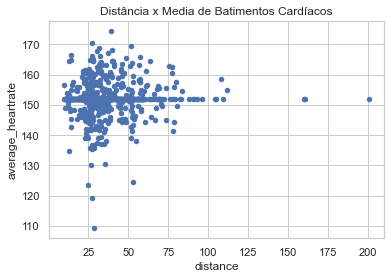

In [156]:
# criando dataframe para o gráfico de dispersão
df_scatter_ride = df_analise[['distance', 'average_heartrate']]

# convertendo a coluna distancia para o valor em kilometros
df_scatter_ride['distance'] = df_scatter_ride['distance'] / 1000

# criando grafico de dispersão
df_scatter_ride.plot.scatter(x='distance',y='average_heartrate')

# visualizando grafico
plt.title('Distância x Media de Batimentos Cardíacos')


Conforme o gráfico acima observa-se que uma maior concentração de valores de batimentos cardíacos entre 140 a 160 batimentos por minuto(bpm) e uma concentração nas distâncias entre 25 e 50 kilometros. Neste caso pode-se concluir que as maiores médias de batimentos estão dentro da distância entre 25 e 50 kilometros.

#### 1.2.4.2 Distancia por máxima de batimentos

Gerando vizualiação da relação entre as distancias percorridas e a máxima de batimentos cardíacos e qual zona de treino se encontram.

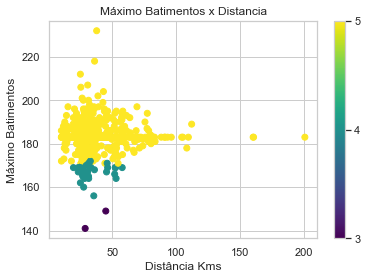

In [175]:
# Selecting relevant columns
df_scatter_teste = df_analise[['distance', 'max_heartrate', 'zona_treino']]
# convertendo a coluna distancia para o valor em kilometros
df_scatter_teste['distance'] = df_scatter_teste['distance'] / 1000
# Creating the scatter plot
plt.scatter(x='distance', y='max_heartrate', c='zona_treino', cmap='viridis', data=df_scatter_teste)

# Setting colorbar ticks to match unique values in 'zona_treino'
plt.colorbar(ticks=df_scatter_teste['zona_treino'].unique())

# Setting title and labels
plt.title('Máximo Batimentos x Distancia')
plt.xlabel('Distância Kms')
plt.ylabel('Máximo Batimentos')

# Showing the plot
plt.show()

No gráfico acima observa-se que a maior parte das distancias percorridas foi com o nível máximo de batimentos cardíacos entre 160 a 200 bpm e a zona de treino ficou acima da zona 4, mostrando a intesidade do treino que é considerado na faixa anaeróbica. 

#### 1.2.4.3 Elevação por máxima de batimentos e zona de treino

Gerando vizualiação da relação entre a maxima elevação alcançada e a máxima de batimentos cardíacos e qual zona de treino se encontram.

Text(0.5, 1.0, 'Elevação x Maximo Batimentos Cardíacos')

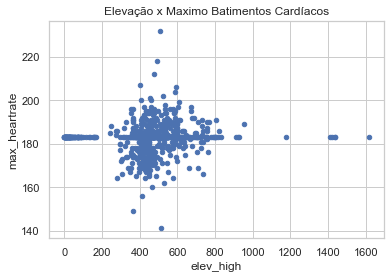

In [158]:
df_scatter_elev = df_analise[['elev_high', 'max_heartrate','zona_treino']]

df_scatter_elev.plot.scatter(x='elev_high',y='max_heartrate',cmap='RdYlBu')
plt.title('Elevação x Maximo Batimentos Cardíacos')

Conforme o gráfico acima é possível observar que máxima de batimentos esta concentrada entre 160 e 200 bpm e o ganho de elevevação ficou entre 200 a 600 metros, mostrando que o aumento do batimentos cardíacos independem do ganho de elevação.

#### 1.2.4.5 Total de kilometros percorrido por ano

Visualização do total de kilometros pecorrido por ano

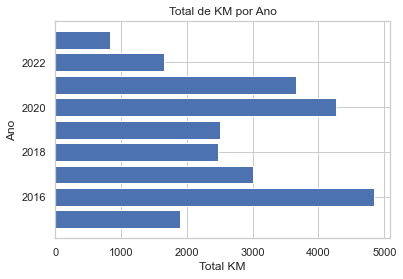

In [159]:
# sumarizando a distancia por ano
df_analise['year'] = pd.to_datetime(df_analise['start_date']).dt.year  # Extract the year
result = df_analise.groupby('year')['distance'].sum().reset_index(name='totalKm')

# grafico distancia ano

# plotando o histograma
plt.barh(result['year'], result['totalKm']/1000)

# incluindo título do gráfico e legenda
plt.title('Total de KM por Ano')
plt.ylabel('Ano')
plt.xlabel('Total KM');


Observa-se no gráfico acima que o ano de 2016 foi o que mais teve mais distância percorrida e que 2023 foi o ano de menor atividade.

## 1.3 Pré-processamento
Nesta etapa iremos preparar o modelo de Machine Learning criando um novo dataframe.

### 1.3.1 Normalizando
Nesta etapa será feita a normalização dos dados de todos os atributos do intervalo original para o intervalo de 0 a 1, com o objetivo de alterar os valores para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

In [160]:
# criando novo dataframe para preparar o modelo
df_teste = df_analise.loc[:,['distance','start_date','moving_time','total_elevation_gain','average_heartrate','max_heartrate', 'elev_high', 'Age','FCmax','zona_freq','zona_treino','year']]

# convertendo o campo data para numerico
df_teste['start_date'] = pd.to_numeric(df_teste['start_date'])

In [161]:
# separando o array em componentes de input e output
X = df_teste.values[:,0:9]
y = df_teste.values[:,9]

In [162]:
# ordinal encoding para os atributos X
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", df_teste.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[2.16628000e+04 1.69909627e+18 6.35200000e+03 ... 1.06779661e+02
  5.00000000e+00 2.02300000e+03]
 [2.02810000e+04 1.69892080e+18 7.38500000e+03 ... 1.10734463e+02
  5.00000000e+00 2.02300000e+03]
 [2.18280000e+04 1.69849104e+18 8.17200000e+03 ... 1.09604520e+02
  5.00000000e+00 2.02300000e+03]
 ...
 [7.92123000e+04 1.43427706e+18 1.35950000e+04 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]
 [4.76690000e+04 1.43367300e+18 7.90000000e+03 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]
 [2.81511000e+04 1.42520632e+18 1.07660000e+04 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]]

Dados Normalizados: 

 [[6.11535752e-02 1.00000000e+00 1.54854179e-01 ... 3.71069572e-01
  1.00000000e+00 0.00000000e+00]
 [5.39005573e-02 9.99359356e-01 1.83655830e-01 ... 3.32074771e-01
  1.00000000e+00 0.00000000e+00]
 [6.20207040e-02 9.97790229e-01 2.05598617e-01 ... 3.29970290e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [3.63228805e-01 3.31181709e-02 3.56800312e-01 ... 1.1

### 1.3.2 Padronizando
Agora faz a padronização com a distribuição de todos os atributos dos valores observados para que eles tenham as propriedades de uma distribuição normal padrão (média 0 e desvio padrão 1).

In [163]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", df_teste.values)
print("\nDados Padronizados: \n\n", rescaledX)

Dados Originais: 

 [[2.16628000e+04 1.69909627e+18 6.35200000e+03 ... 1.06779661e+02
  5.00000000e+00 2.02300000e+03]
 [2.02810000e+04 1.69892080e+18 7.38500000e+03 ... 1.10734463e+02
  5.00000000e+00 2.02300000e+03]
 [2.18280000e+04 1.69849104e+18 8.17200000e+03 ... 1.09604520e+02
  5.00000000e+00 2.02300000e+03]
 ...
 [7.92123000e+04 1.43427706e+18 1.35950000e+04 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]
 [4.76690000e+04 1.43367300e+18 7.90000000e+03 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]
 [2.81511000e+04 1.42520632e+18 1.07660000e+04 ... 9.89189189e+01
  5.00000000e+00 2.01500000e+03]]

Dados Padronizados: 

 [[-0.74799658  1.92686826 -0.14360204 ...  0.71038328  1.78088537
  -1.78088537]
 [-0.82018128  1.92446426  0.16709218 ...  0.39074711  1.78088537
  -1.78088537]
 [-0.7393666   1.91857617  0.40379726 ...  0.3734969   1.78088537
  -1.78088537]
 ...
 [ 2.2583668  -1.70132277  2.03486671 ... -2.23990929 -1.56741898
   1.56741898]
 [ 0.61055714 -1.70959883  

# 2 Conclusão

Terminado a análise dos dados com a realização dos devidos tratamentos, visualizando a relação dos atributos com informação sobre a distância, média e máxima de batimentos cardiácos e o ganho de elevação, é possível concluir que a há um padrão médio da zona de treino mostrando que é necessário uma correção na frequência cardiaca durante os exercícios, porém mostra-se necessário a inclusão de novos atributos para permitir uma melhor precisão das análises.

No pré-processamento que prepara o modelo para Machine Learning foi necessário modificar o atributo start_date para númerico pois ocorreu um erro com o tipo do atributo definido anteriormente.